In [ ]:
# ISC4221 - Lab 3
# by: Andres Candido
# Part 1, Task 2:

import numpy as np
import math

np.random.seed(56789)    # set random number generator seed (turn it into comment if not needed)

def f1(x):
  return math.cos(math.pi*x)

def f2(x):
  func = (  (math.cos(x)) + (5*math.cos(1.6*x)) - (2*math.cos(2*x)) + (5*math.cos(4.5*x)) + (7*math.cos(9*x))  )
  return func

def f3(x):
  func = (-1)*( ((1/(math.cosh(10*(x-0.2))))**2) + ((1/(math.cosh(100*(x-0.4))))**2) + ((1/(math.cosh(1000*(x-0.6))))**2) )
  return func


def monte_carlo(nsamples, lower, upper):

  sum_of_samples = 0
  for i in range(nsamples+1):
      x = np.random.uniform(lower, upper)
      point = f2(x)                               # here we call the desired function f1, f2, or f3 (change boundaries and expected y bellow according to used function)

      if i == 0:
        miny = point
        minx = x
      
      if point<miny:
        miny = point
        minx = x

  min = [miny, minx]
  
  return min



nsample = 1600                                  # higher number of samples leads to more accurate results
xl = 2.0                                        # remember to change boundaries f1=[0,1] , f2=[2,7] , f3=[0,1]
xr = 7.0

Expected = -13.08                               # remember to change expected y value of min  f1=-1 , f2=-13.08 , f3=-1.0707

Global_minimum = monte_carlo(nsample, xl, xr)

print('Monte Carlo Approximation of f(x):')
print('Global minimum y pos:', Global_minimum[0] )
print('Global minimum x pos:', Global_minimum[1] )
print('error:', abs( (Expected-Global_minimum[0])/Global_minimum[0]) )

Monte Carlo Approximation of f(x):
Global minimum y pos: -13.079378016244807
Global minimum x pos: 5.9768140560793155
error: 4.755453618826501e-05


The initial position (x,y) is: [0.0, 6.0]
The final position (x,y) is: [10.0, 2.0]
Total steps taken: 58


Text(0.5, 1.0, '2D Random Walk - Path taken:')

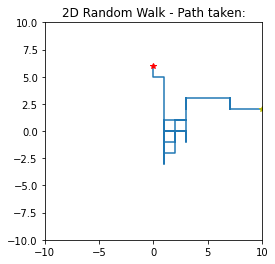

In [16]:
# Part 2, Task 1:

import numpy as np
import matplotlib.pyplot as plt



n = 10                          # Since the object can only move in a tiled square of (2n+1) × (2n+1) “tiles” of length one, 
                                # n is the max value of x or y that the object can walk away from the origin before it stops (Our step size is always 1 in any possible direction)
x = np.array([])
y = np.array([])

x = np.append(x, 0)             # select origin location (x and y must be less than n and greater than -n) 
y = np.append(y, 6)

begin_pos = [x[0],y[0]]
print('The initial position (x,y) is:',begin_pos)

total_steps=0
i = 0

while abs(x[i])<n and abs(y[i])<n:
  x_or_y = np.random.randint(0,2)    #generate random ints from 0 to 1 (2 is excluded from drawed ints), determines if we move in x or y axis 
  move = np.random.randint(-1,2)     #generate random ints from -1 to 1 (2 is excluded from drawed ints), determines by how much we move in x or y axis

  if x_or_y==0 and move!=0:
    x = np.append(x, x[i] + move)
    y = np.append(y, y[i])
    total_steps += 1
    i += 1

  if x_or_y==1 and move!=0:
    y = np.append(y, y[i]+ move)
    x = np.append(x, x[i])
    total_steps += 1
    i += 1
 
end_position=[x[i],y[i]]

print('The final position (x,y) is:',end_position)
print('Total steps taken:',total_steps)

if n%2 ==0:
  tiles= n
else:
  titles = (n-1)/2

plt.plot(x, y)
plt.plot(x[0], y[0], 'r*')
plt.plot(x[i], y[i], 'y*')
plt.axis('square')
plt.axis( [-tiles, tiles, -tiles, tiles] )
plt.grid(0)
plt.title('2D Random Walk - Path taken:')

In [18]:
# Part 2, Task 2:

import numpy as np
import math
from scipy import integrate

e=2.71828182

func = lambda x,y: e**(y) * math.cos(x)

prob = integrate.quad(func, 0, 1, 0, 1)

print(prob)

(0.8414709848078965, 9.34220461887732e-15, {'neval': 21, 'last': 1, 'iord': array([         1,          0,          0,          0,          0,
       1072693248,          0, 1072693248,          0, 1072693248,
                0, 1072693248,          0, 1072693248,          0,
       1072693248,          0, 1072693248,          0, 1072693248,
                0, 1073741824,          0, 1072693248,          0,
       1073741824,          0, 1072693248,          0, 1072693248,
                0, 1072693248,          0, 1072693248,          0,
       1072693248,          0, 1073741824,          0, 1073741824,
                0, 1073741824,          0, 1073741824,          0,
       1074266112,          0, 1073741824,          0, 1074266112],
      dtype=int32), 'alist': array([ 0.,  6.,  6.,  5.,  5.,  6.,  6.,  6.,  6.,  6.,  6.,  5.,  4.,
        4.,  5.,  4.,  4.,  5.,  4.,  4.,  3.,  2.,  1.,  0.,  1.,  1.,
        2.,  2.,  3.,  2.,  2.,  3.,  2.,  1.,  0., -1., -1., -1., -1.,
       -